**Predict who will move to a new job**

####**Context and Content**
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

* The dataset is imbalanced.
* Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
* Missing imputation can be a part of your pipeline as well.

<br/>
Features

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change


Inspiration


* Predict the probability of a candidate will work for the company
* Interpret model(s) such a way that illustrate which features affect candidate decision

####**Importing Libraries**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

####**Loading Data**

In [2]:
train = pd.read_csv("/content/aug_train.csv")
test = pd.read_csv("/content/aug_test.csv")
df = train.append(test).reset_index(drop = True)

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(21287, 14)

In [5]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

####**Filling Missing Values**

In [6]:
df.isna().sum()/len(df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235637
relevent_experience       0.000000
enrolled_university       0.019589
education_level           0.024052
major_discipline          0.146803
experience                0.003288
company_size              0.308169
company_type              0.318222
last_new_job              0.021750
training_hours            0.000000
target                    0.100014
dtype: float64

In [7]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [8]:
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [9]:
df['experience'] = df['experience'].apply(lambda x: '0' if x == '<1' else x)
df['experience'] = df['experience'].apply(lambda x: '20' if x == '>20' else x)
df['last_new_job'] = df['last_new_job'].apply(lambda x: '4' if x == '>4' else x)
df = df[df['target'].notna()]

In [10]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
df["gender"].fillna(df["gender"].mode()[0], inplace = True )
df["enrolled_university"].fillna(df["enrolled_university"].mode()[0], inplace = True)
df["education_level"].fillna(df["education_level"].mode()[0], inplace = True)
df["major_discipline"].fillna(df["major_discipline"].mode()[0], inplace = True)
df["experience"].fillna(df["experience"].mode()[0], inplace = True)
df["company_size"].fillna(df["company_size"].mode()[0], inplace = True)
df["company_type"].fillna(df["company_type"].mode()[0], inplace = True)
df["last_new_job"].fillna(df["last_new_job"].mode()[0], inplace = True)

In [12]:
df.isna().sum()/len(df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [13]:
df.shape

(19158, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### **Data Exploration and Visualization**
In this section we vizualise the data using univariate and bi-variate plots and simple descriptive statistics.

In [15]:
total = df.shape[0]

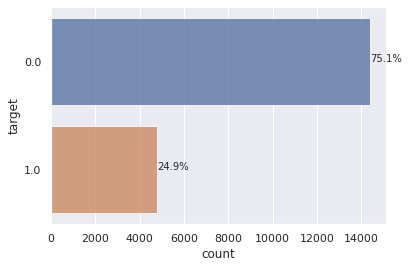

In [16]:
ax = sns.countplot(y="target", data=df, alpha=0.8)
total = df.shape[0]

for p in ax.patches:
    percent = '{:.1f}%'.format(100*(p.get_width()/total))
    x = p.get_x()+p.get_width()
    y = p.get_y()+(p.get_height())/2
    ax.annotate(percent,(x,y))

We can see that this data set is imbalanced Data set since only 25% of people in target data is looking for job change

In [17]:
index = df.dtypes[df.dtypes == object].index

In [18]:
index

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

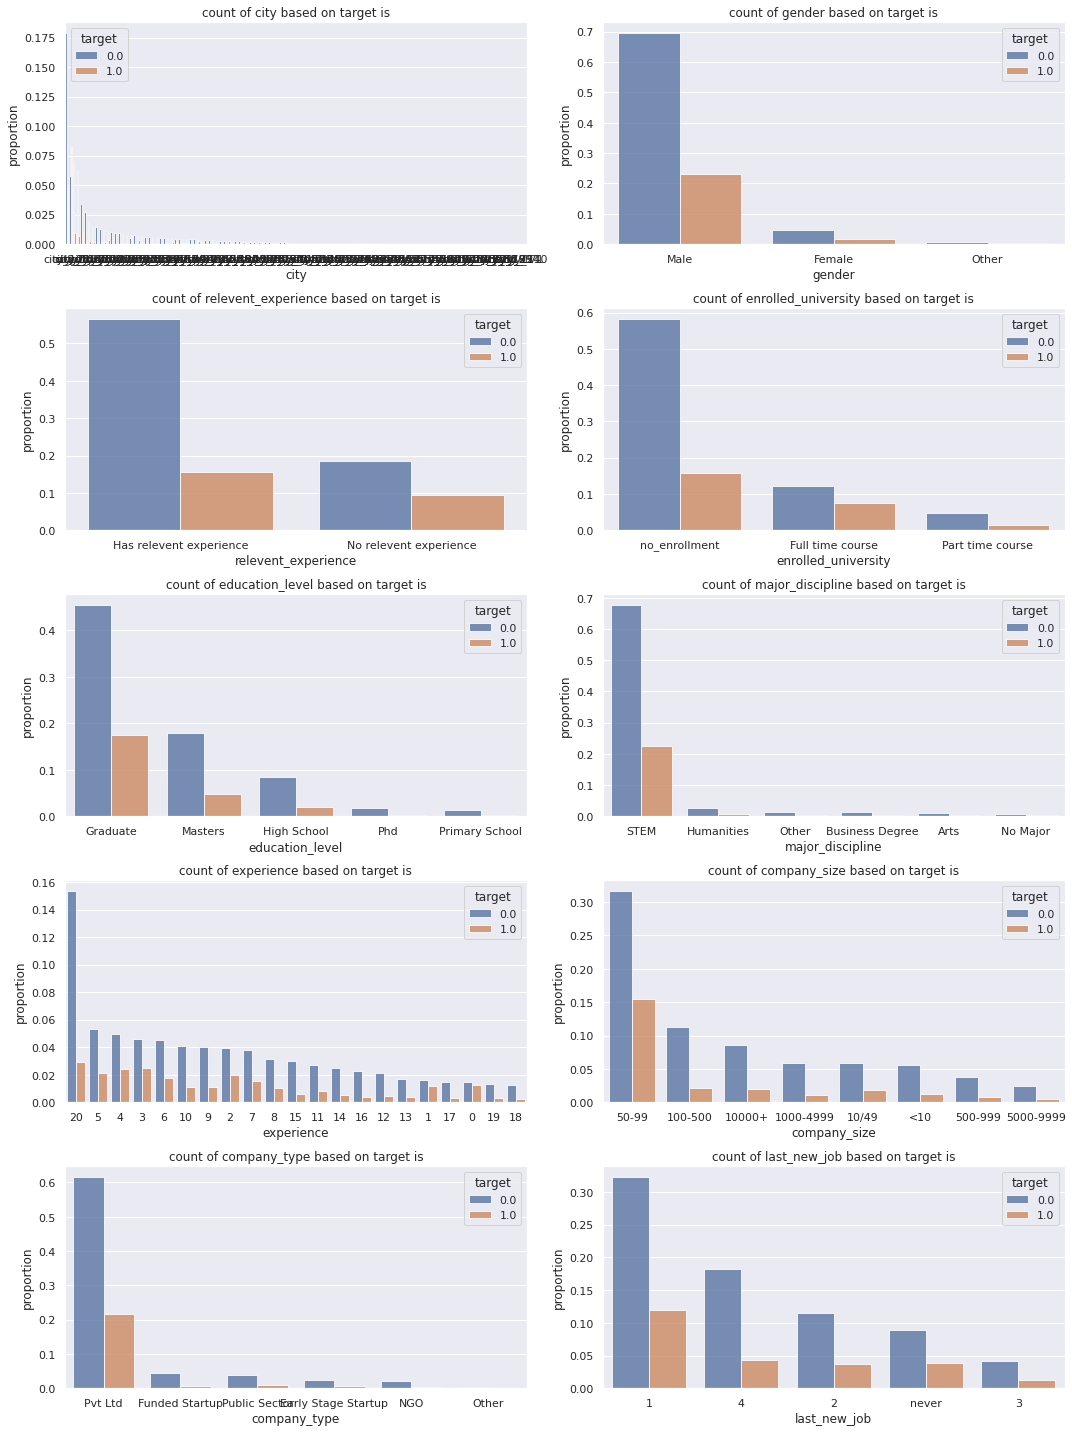

In [19]:
m= 1
plt.figure(figsize=[15,20])
for i in index:
    plt.subplot(5,2,m)
    ### we can normalise the data and plot which would make the plot to run faster, and give a clear analysis
    df[[i,'target']].value_counts(normalize= True).rename('proportion').reset_index().pipe((sns.barplot,'data'),x=i,y = 'proportion', hue= 'target', alpha =.8)
    #sns.countplot(x=i,hue='target',data=df)
    m = m+1
    plt.tight_layout()
    plt.title('count of {} based on target is'.format(i))

on second graph Male propotion is higher and most of them are not looking for job change,it doesn't give any information.

on third graph People who have relevent experience are not looking for job change.

on fourth graph we can see people who are invlved in full time courses are more likely looking for job change.

on seventh graph people who have 4,5,3,6,1,2 and lessthan 1  are more likely looking for a job change when compare to the propotion of other experienced people.

on ninth graph most of the people are fromm PVT Ltd who are looking for a job change

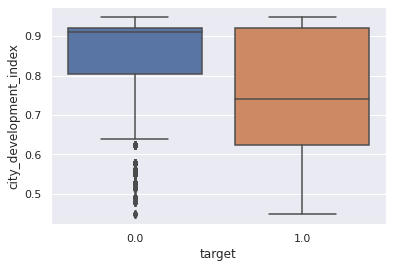

In [20]:
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='target'
ylabel = 'city_development_index'

we can see that most of the people liveing in city having index more than 9 are not looking for the job change

Similarly most of the people living in city having low index are looking for job change

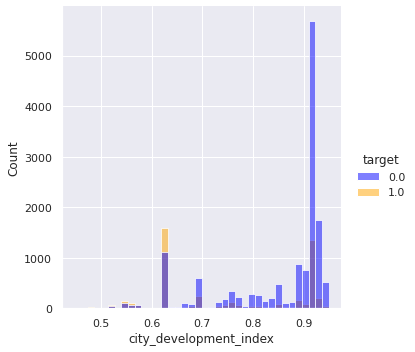

In [21]:
sns.displot(x ='city_development_index',hue='target',data =df, palette=['blue', 'orange'])

we can see that most of the people who live in the city index near 0.9 don't look for the job change

but the people living in city index near .6 are more likely looking for job change

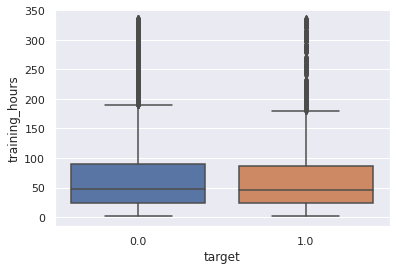

In [22]:
sns.boxplot(y = 'training_hours',x = 'target',data=df)

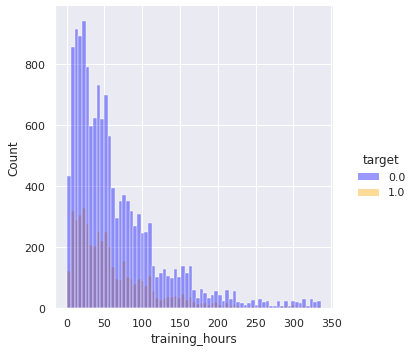

In [23]:

sns.displot(x='training_hours',hue= 'target',data = df, palette=['blue', 'orange'], alpha=0.4)

we can see that people having traing hours of 0-50 are more likely looking for the job change

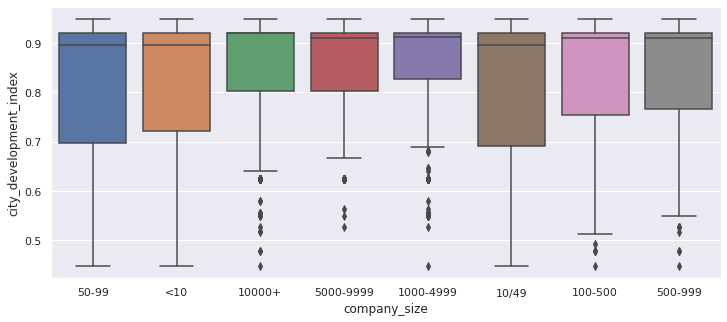

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='company_size',y='city_development_index',data=df)

Here we can see most of the companies are in city index more than .9

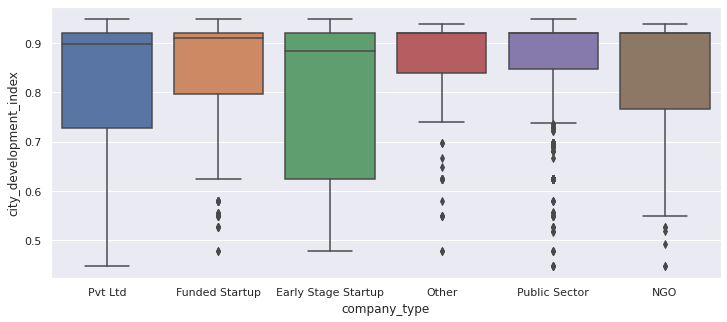

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x='company_type',y='city_development_index',data=df)

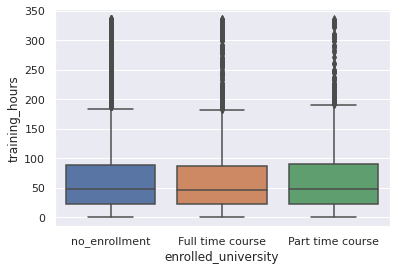

In [26]:
sns.boxplot(x='enrolled_university',y='training_hours',data=df)

Here we try to measure correlation in data using Correlation coefficients.

Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

1 indicates a strong positive relationship.
-1 indicates a strong negative relationship.
A result of zero indicates no relationship at all.

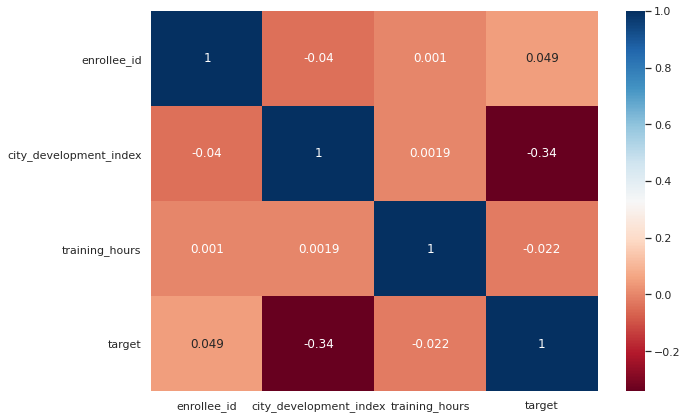

In [27]:
corr = df.corr()

sns.set(rc={'figure.figsize': (10, 7)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

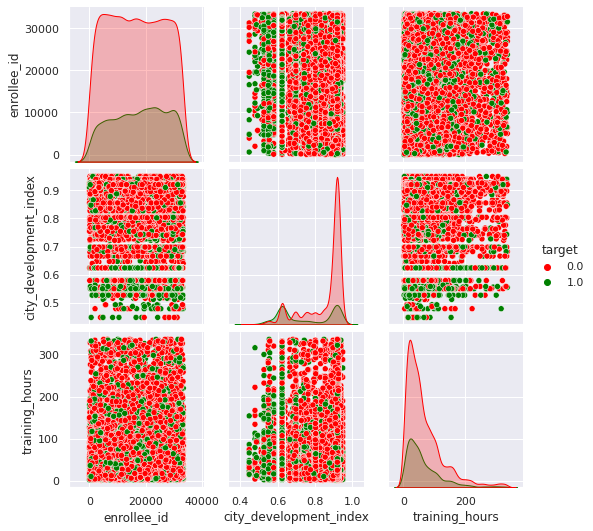

In [28]:
sns.pairplot(df, hue="target", palette=['red', 'green'])

####**Preprocessing**

In [29]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Here we are creating a function that converts all values of gender and etc below into numbers (category)

['gender'], ['relevent_experience'] , ['enrolled_university'],
['education_level'], ['major_discipline'], ['experience'], ['company_type'], ['company_size']
['last_new_job'], ['city']

In [30]:
gender = df.gender.unique()
relevent_experience = df.relevent_experience.unique()
enrolled_university = df.enrolled_university.unique()
education_level = df.education_level.unique()
major_discipline = df.major_discipline.unique()
experience = df.experience.unique()
company_size = df.company_size.unique()
company_type = df.company_type.unique()
last_new_job = df.last_new_job.unique()
city = df.city.unique()

gender_dict = dict(zip(gender, range(len(gender))))
relevent_experience_dict = dict(zip(relevent_experience, range(len(relevent_experience))))
enrolled_university_dict = dict(zip(enrolled_university, range(len(enrolled_university))))
education_level_dict = dict(zip(education_level, range(len(education_level))))
major_discipline_dict = dict(zip(major_discipline, range(len(major_discipline))))
experience_dict = dict(zip(experience, range(len(experience))))
company_size_dict = dict(zip(company_size, range(len(company_size))))
company_type_dict = dict(zip(company_type, range(len(company_type))))
last_new_job_dict = dict(zip(last_new_job, range(len(last_new_job))))
city_dict = dict(zip(city, range(len(city))))

In [31]:
def gender_to_numeric(x):
  for key in gender_dict:
    if x == key:
      return gender_dict[key]

def rel_experience(x):
  for key in relevent_experience_dict:
    if x == key:
      return relevent_experience_dict[key]

def enrollment(x):
  for key in enrolled_university_dict:
    if x == key:
      return enrolled_university_dict[key]

def edu_level(x):
  for key in education_level_dict:
    if x == key:
      return education_level_dict[key]

def major(x):
  for key in major_discipline_dict:
    if x == key:
      return major_discipline_dict[key]

def experience(x):
  for key in experience_dict:
    if x == key:
      return experience_dict[key]

def company_t(x):
  for key in company_type_dict:
    if x == key:
      return company_type_dict[key]

def company_s(x):
  for key in company_size_dict:
    if x == key:
      return company_size_dict[key]

def last_job(x):
  for key in last_new_job_dict:
    if x == key:
      return last_new_job_dict[key]

def city(x):
  for key in city_dict:
    if x == key:
      return city_dict[key]


In [32]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int64  
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  int64  
 6   education_level         19158 non-null  int64  
 7   major_discipline        19158 non-null  int64  
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(12)
memory usage:

####**Model**

In [34]:
X = df.drop(columns=['target'])
Y = df['target']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

In [36]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:30   Log-Likelihood:                -7980.3
No. Observations:               16284   AIC:                         1.599e+04
Df Residuals:                   16270   BIC:                         1.610e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

######**Impact of MinMax Transform on Regression Coefficients**

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

In [38]:
X2 = sm.add_constant(X_scaled)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:30   Log-Likelihood:                -7980.3
No. Observations:               16284   AIC:                         1.599e+04
Df Residuals:                   16270   BIC:                         1.610e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7638      0.015     51.885      0.0

######**ROC CURVE**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve

X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled , Y, test_size=0.15, random_state=9)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_train)

y_pred_test = lr.predict(X_test)

auc_train = roc_auc_score(Y_train, y_pred)
auc_test = roc_auc_score(Y_test, y_pred_test)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")
fpr, tpr, _ = roc_curve(Y_test, y_pred_test)

Train AUC Score 0.6150137991111909
Test AUC Score 0.6239070867323958


In [85]:
def plot_auc_curve(fpr, tpr, auc):
    plt.figure(figsize = (16,6))
    plt.plot(fpr,tpr,'b+',linestyle = '-')
    plt.fill_between(fpr, tpr, alpha = 0.5)
    plt.ylabel('True Postive Rate')
    plt.xlabel('False Postive Rate')
    plt.title(f'ROC Curve Having AUC = {auc}')

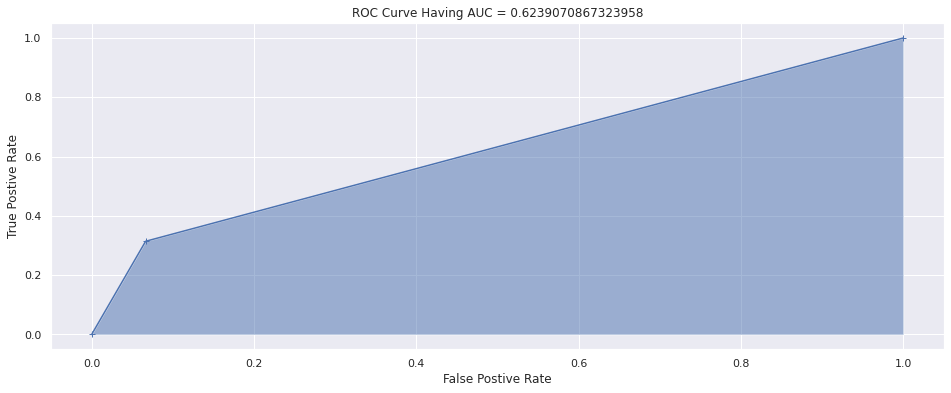

In [86]:
plot_auc_curve(fpr, tpr, auc_test)

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train, Y_train)

y_pred = dt.predict(X_train)

y_pred_test = dt.predict(X_test)

auc_train = roc_auc_score(Y_train, y_pred)
auc_test = roc_auc_score(Y_test, y_pred_test)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")
fpr, tpr, _ = roc_curve(Y_test, y_pred_test)

Train AUC Score 0.8448345794407871
Test AUC Score 0.6282699814824083


We can clearly see that the model with decision tree is overfitting on the training data

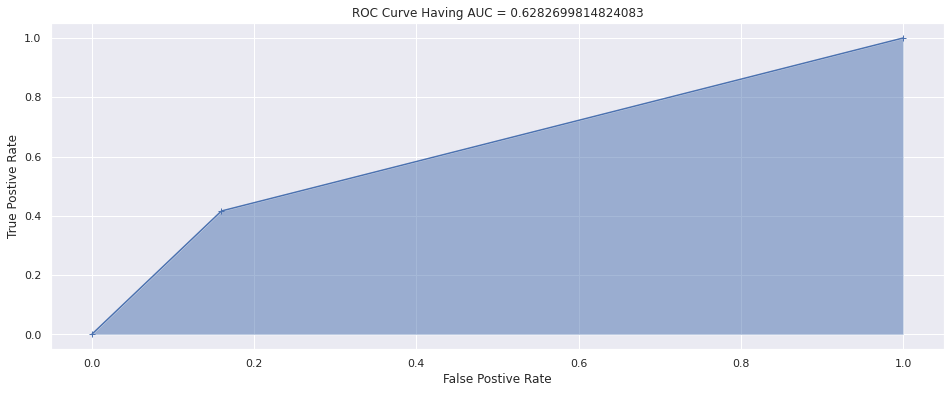

In [88]:
plot_auc_curve(fpr, tpr, auc_test)

In [89]:
from xgboost import XGBClassifier

clf = XGBClassifier()

clf.fit(X_train, Y_train)

y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_test_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_test_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

Train AUC Score 0.802246910214882
Test AUC Score 0.7948297757869976


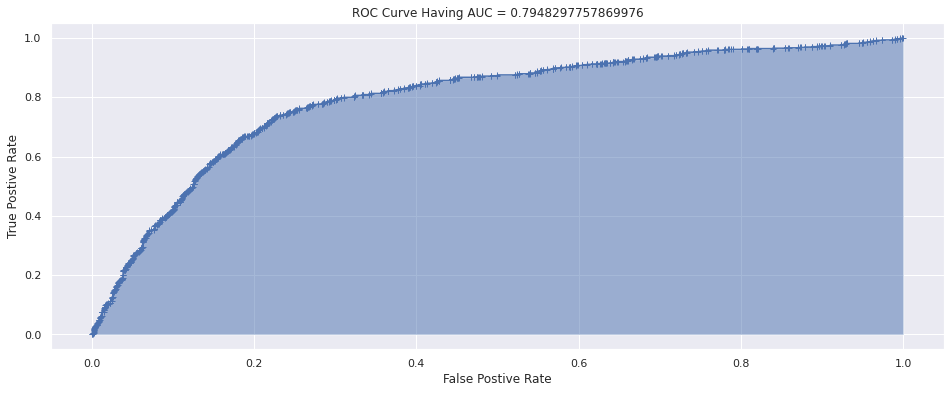

In [90]:
plot_auc_curve(fpr, tpr, auc_test)

####**Learning Curve**

In [91]:
# funtion to plot learning curves

def plot_learning_curve(model, X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
    train_loss, test_loss = [], []
    
    for m in range(200,len(x_train),200):
        
        model.fit(x_train.iloc[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(x_train.iloc[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))
        
        y_test_prob_pred = model.predict_proba(x_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plt.figure(figsize = (15,8))
    plt.plot(train_loss, 'r-+', label = 'Training Loss')
    plt.plot(test_loss, 'b-', label = 'Test Loss')
    plt.xlabel('Number Of Batches')
    plt.ylabel('Log-Loss')
    plt.legend(loc = 'best')



    plt.show()

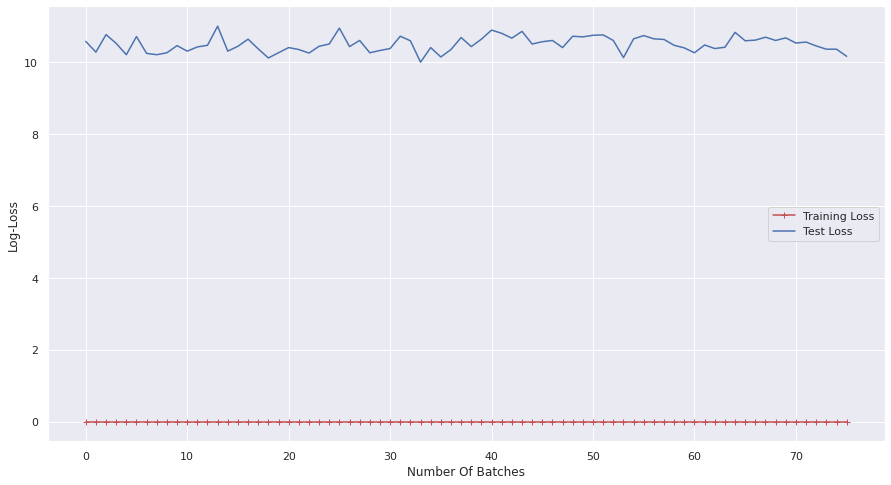

In [93]:
plot_learning_curve(DecisionTreeClassifier(), X, Y)

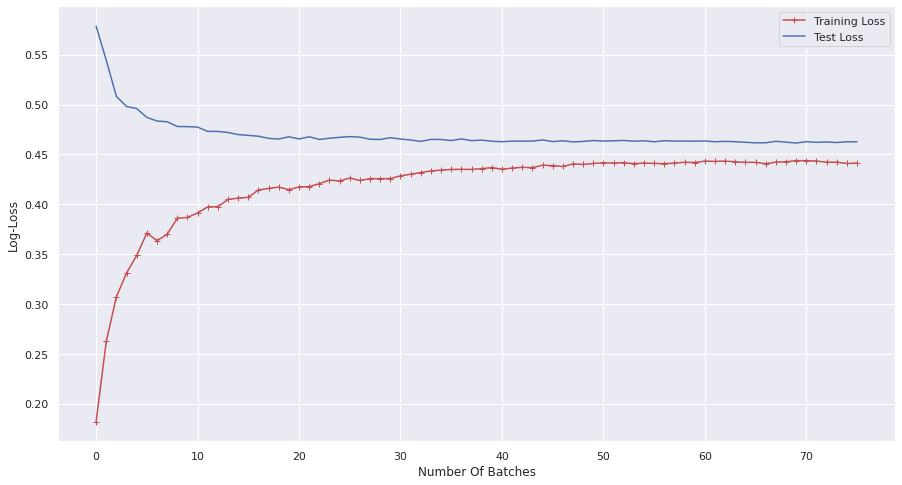

In [92]:
plot_learning_curve(XGBClassifier(), X, Y)

####**Hyperparameter Tuning**

The parameters that the model has here are known as hyper-parameters, i.e. the parameters that control the training/fitting process of the model.

Let’s say there are three parameters a, b, c in the model, and all these parameters can be integers between 1 and 10. A “correct” combination of these parameters will provide you with the best result. So, it’s kind of like a suitcase with a 3-dial combination lock. However, in 3 dial combination lock has only one correct answer. The model has many right answers. So, how would you find the best parameters? A method would be to evaluate all the combinations and see which one improves the metric. We go through all the parameters from 1 to 10. So, we have a total of 1000 (10 x 10 x 10) fits for the model. Well, that might be expensive because the model can take a long time to train. Let's visit some efficient methods

Random Search : Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.\ Scikit-Learn User Guide for Random Search

Grid Search : Define a search space as a grid of hyperparameter values and evaluate every position in the grid.\ Scikit-Learn User Guide for Grid Search

In this notebook i am using Bayesian optimization with gaussian process

Bayesian optimization algorithm need a function they can optimize. Most of the time, it’s about the minimization of this function, like we minimize loss.

######**For Decision Trees**

In [94]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [95]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [96]:
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [101]:
dt_best = grid_search.best_estimator_

In [102]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(Y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(Y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(Y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(Y_test, dt_classifier.predict(X_test)))

In [103]:
evaluate_model(dt_best)

Train Accuracy : 0.7835912552198477
Train Confusion Matrix:
[[11125  1136]
 [ 2388  1635]]
--------------------------------------------------
Test Accuracy : 0.7759220598469033
Test Confusion Matrix:
[[1917  203]
 [ 441  313]]


######**For Xgboost**

In [104]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [116]:
#define a parameter space

params = {
    'n_estimators' : [x for x in range(100,1000,10)],
    'min_child_weight' : [0.01, 0.05, 0.1, 1 ,10],
    'gamma' : [0.01, 0.05, 0.1, 0.5, 1, 10]
}


In [117]:
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 10

In [118]:
clf_best = grid_search.best_estimator_

In [119]:
def evaluate_model(clf_classifier):
    print("Train Accuracy :", accuracy_score(Y_train, clf_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(Y_train, clf_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(Y_test, clf_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(Y_test, clf_classifier.predict(X_test)))

In [120]:
evaluate_model(clf_best)

Train Accuracy : 0.7894866126258905
Train Confusion Matrix:
[[11099  1162]
 [ 2266  1757]]
--------------------------------------------------
Test Accuracy : 0.7738343771746694
Test Confusion Matrix:
[[1906  214]
 [ 436  318]]
